In [ ]:

!pip uninstall -y tensorflow

!pip uninstall -y tensorflow keras

!pip install tensorflow==2.14.0 keras==2.14.0


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa

!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.0 MB/s eta 0:00:00


Number of audio files in flute path: 168
Number of audio files in gataberaya path: 168
Number of combined flute files: 840
Number of combined gataberaya files: 840
Plotting Flute Class Spectrograms...
Plotting Gataberaya Class Spectrograms...


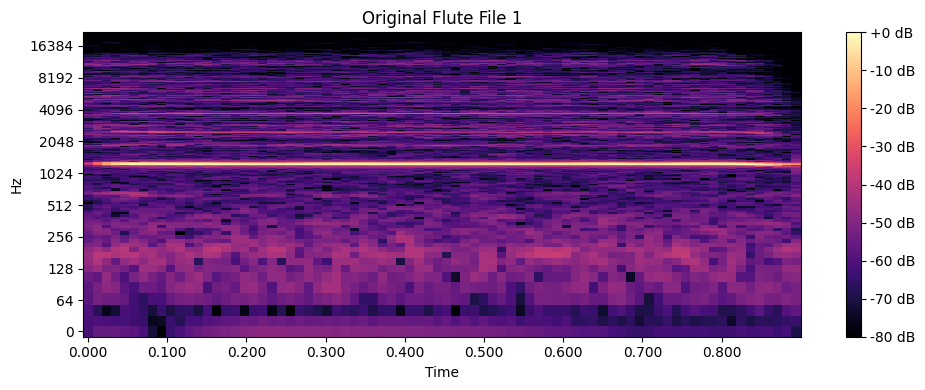

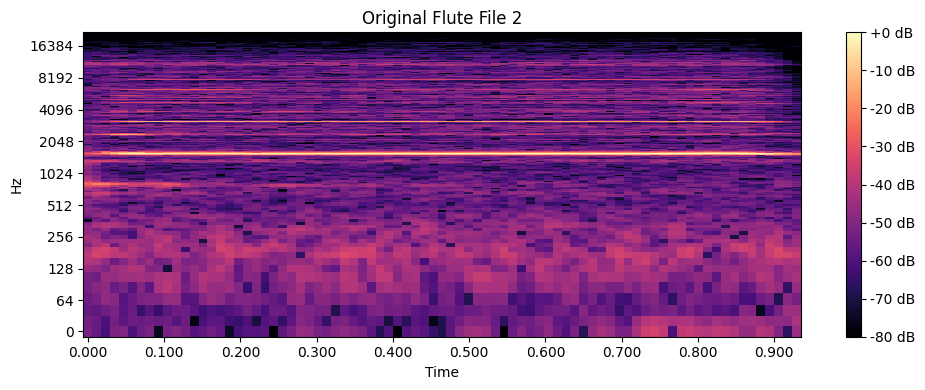

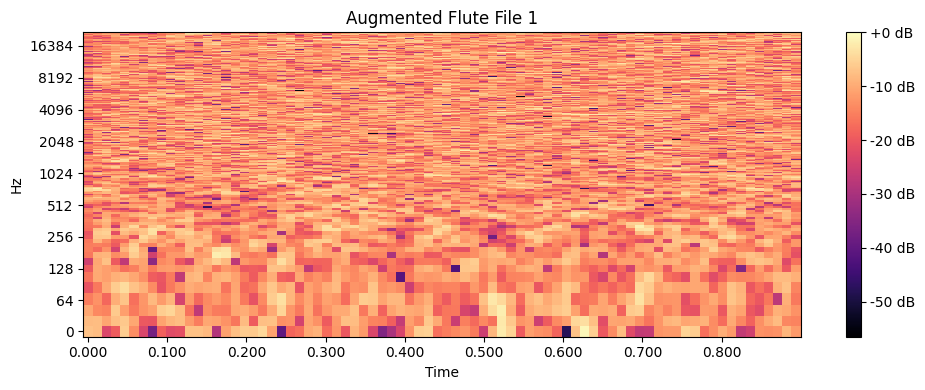

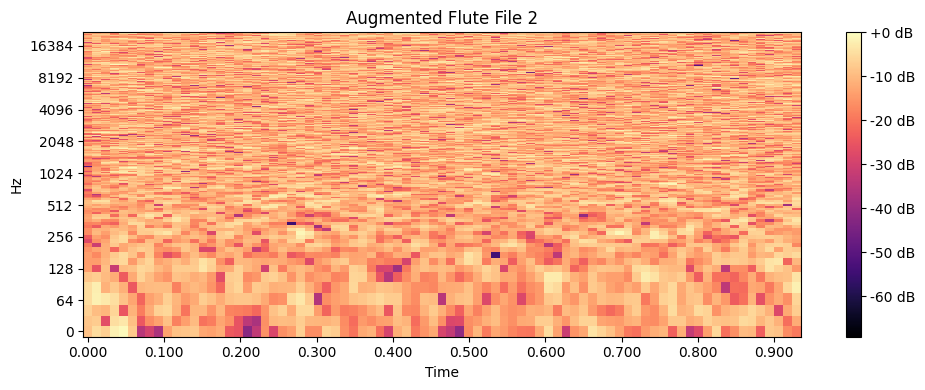

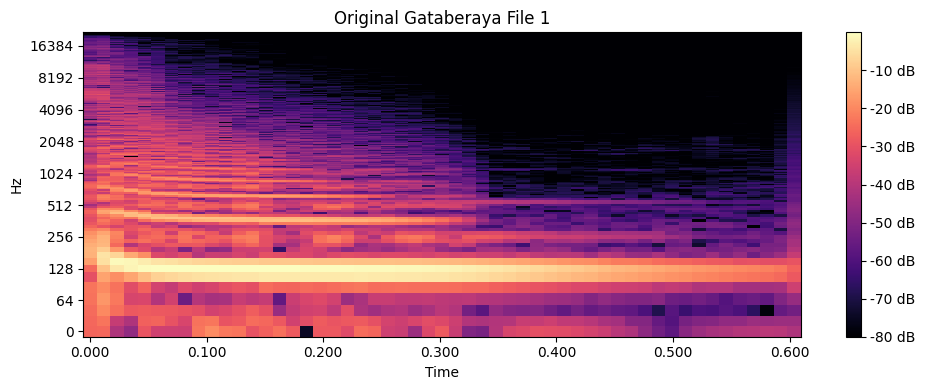

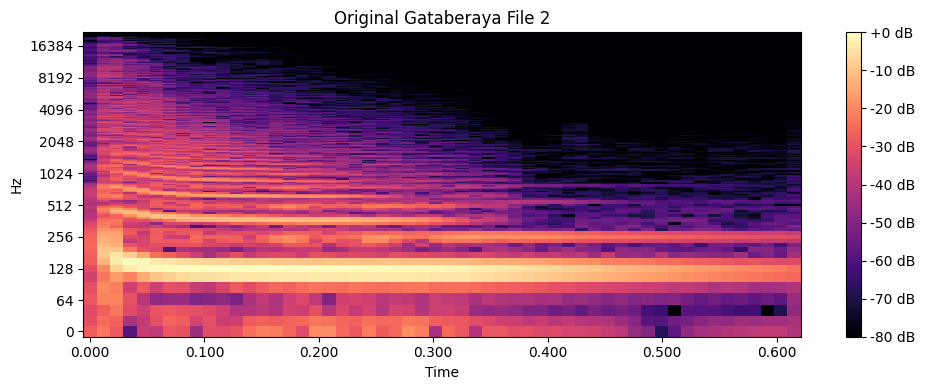

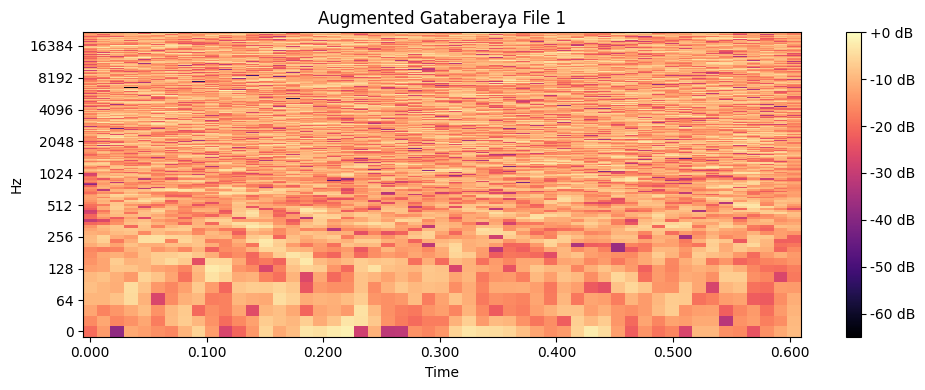

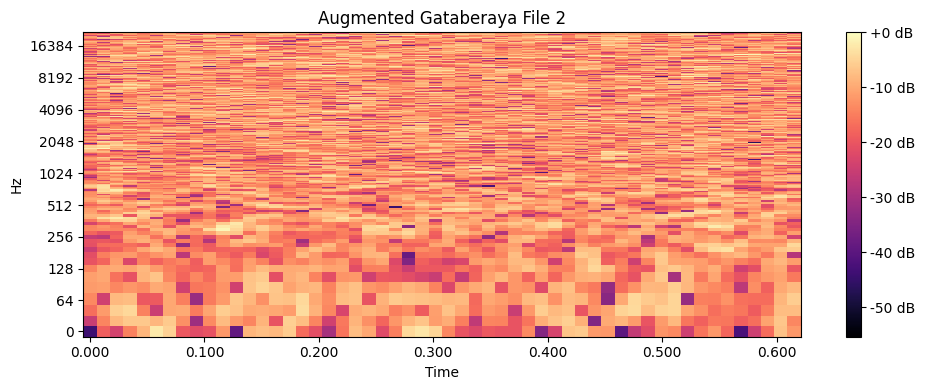

In [ ]:
import os

# Paths
flute_path = '/content/drive/MyDrive/1.0 audio classification /flute'
gataberaya_path = '/content/drive/MyDrive/1.0 audio classification /gataberaya'

# Function to count audio files
def count_audio_files(path):
    return len([f for f in os.listdir(path) if f.endswith('.wav')])

# Count files in each path
flute_count = count_audio_files(flute_path)
gataberaya_count = count_audio_files(gataberaya_path)

print(f"Number of audio files in flute path: {flute_count}")
print(f"Number of audio files in gataberaya path: {gataberaya_count}")

from google.colab import drive
import numpy as np
import librosa
import os
import soundfile as sf
import random

# Paths
flute_path = '/content/drive/MyDrive/1.0 audio classification /flute'
gataberaya_path = '/content/drive/MyDrive/1.0 audio classification /gataberaya'

# Function to add noise
def add_noise(audio, noise_level=0.005):
    noise = np.random.randn(len(audio))
    audio_noisy = audio + noise_level * noise
    return audio_noisy

# Function to apply shifting
def shift_audio(audio, shift_max=0.5):
    shift = np.random.uniform(-shift_max, shift_max) * len(audio)
    return np.roll(audio, int(shift))

# Function to change pitch
def change_pitch(audio, sr, n_steps=2):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)


# Function to change speed
def change_speed(audio, speed_factor=1.2):
    return librosa.effects.time_stretch(audio, rate=speed_factor)

# Function to load original audio files
def load_original_audio_files(path):
    original_files = []
    for filename in os.listdir(path):
        if filename.endswith('.wav'):
            file_path = os.path.join(path, filename)
            audio, sr = librosa.load(file_path, sr=None)
            original_files.append((audio, sr))
    return original_files

# Function to apply a specific augmentation to audio files
def apply_augmentation(original_files, augmentation_fn, *args):
    augmented_files = []
    for audio, sr in original_files:
        if augmentation_fn == change_speed:
            augmented_audio = augmentation_fn(audio, *args)  # No sample rate needed for speed change
        else:
            augmented_audio = augmentation_fn(audio, sr, *args)
        augmented_files.append((augmented_audio, sr))
    return augmented_files

# Load original audio files
original_flute_files = load_original_audio_files(flute_path)
original_gataberaya_files = load_original_audio_files(gataberaya_path)

# Apply each augmentation
flute_noisy = apply_augmentation(original_flute_files, add_noise)
gataberaya_noisy = apply_augmentation(original_gataberaya_files, add_noise)

flute_shifted = apply_augmentation(original_flute_files, shift_audio)
gataberaya_shifted = apply_augmentation(original_gataberaya_files, shift_audio)

flute_pitched = apply_augmentation(original_flute_files, change_pitch, 2)  # You can vary the n_steps
gataberaya_pitched = apply_augmentation(original_gataberaya_files, change_pitch, 2)

flute_speed_changed = apply_augmentation(original_flute_files, change_speed, 1.2)  # No sample rate for speed
gataberaya_speed_changed = apply_augmentation(original_gataberaya_files, change_speed, 1.2)

# Combine original and augmented files
aug_flute = (
    original_flute_files + flute_noisy + flute_shifted + flute_pitched + flute_speed_changed
)
aug_gataberaya = (
    original_gataberaya_files + gataberaya_noisy + gataberaya_shifted + gataberaya_pitched + gataberaya_speed_changed
)

# Count files after combining
aug_flute_count = len(aug_flute)
aug_gataberaya_count = len(aug_gataberaya)

print(f"Number of combined flute files: {aug_flute_count}")
print(f"Number of combined gataberaya files: {aug_gataberaya_count}")


import matplotlib.pyplot as plt
import librosa.display

# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()

# Plot spectrograms for original and augmented audios
def plot_original_and_augmented_spectrograms(original_files, augmented_files, class_name):
    # Plot 2 spectrograms from original files
    for i in range(2):
        audio, sr = original_files[i]
        plot_spectrogram(audio, sr, f"Original {class_name} File {i+1}")

    # Plot 2 spectrograms from augmented files
    for i in range(2):
        audio, sr = augmented_files[i]
        plot_spectrogram(audio, sr, f"Augmented {class_name} File {i+1}")

# Select 2 original and 2 augmented files from each class
selected_flute_originals = original_flute_files[:2]
selected_flute_augmented = flute_noisy[:2]  # You can change to flute_shifted, flute_pitched, etc.

selected_gataberaya_originals = original_gataberaya_files[:2]
selected_gataberaya_augmented = gataberaya_noisy[:2]  # You can change to gataberaya_shifted, gataberaya_pitched, etc.

# Plot flute class spectrograms
print("Plotting Flute Class Spectrograms...")
plot_original_and_augmented_spectrograms(selected_flute_originals, selected_flute_augmented, "Flute")

# Plot gataberaya class spectrograms
print("Plotting Gataberaya Class Spectrograms...")
plot_original_and_augmented_spectrograms(selected_gataberaya_originals, selected_gataberaya_augmented, "Gataberaya")

plt.show()




In [ ]:

# Constants
NUM_MFCC = 40  # Number of MFCC features (coefficients)
FIXED_LENGTH = 100  # Fixed number of time frames (sequence length)

"""##Define the Function to Extract Fixed-Length MFCC Features"""

import numpy as np
import librosa

def extract_mfcc_uniform_length(audio, sr, num_mfcc=NUM_MFCC, fixed_length=FIXED_LENGTH):
    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfcc, hop_length=int(len(audio) / fixed_length))

    # Ensure the MFCC length is uniform
    if mfcc.shape[1] == fixed_length:
        return mfcc
    elif mfcc.shape[1] < fixed_length:
        # Pad with zeros if length is shorter than fixed_length
        padding = np.zeros((num_mfcc, fixed_length - mfcc.shape[1]))
        return np.concatenate((mfcc, padding), axis=1)
    else:
        # Truncate if length is longer than fixed_length
        return mfcc[:, :fixed_length]

"""##Extract Features from Augmented Audio Files"""

def extract_features_from_list(audio_files, num_mfcc=NUM_MFCC, fixed_length=FIXED_LENGTH):
    features = []
    for audio, sr in audio_files:
        mfcc = extract_mfcc_uniform_length(audio, sr, num_mfcc, fixed_length)
        features.append(mfcc)
    return features

# Extract features
flute_features = extract_features_from_list(aug_flute)
gataberaya_features = extract_features_from_list(aug_gataberaya)

"""##Create Class Labels"""

# Create class labels
flute_labels = ['flute'] * len(flute_features)
gataberaya_labels = ['gataberaya'] * len(gataberaya_features)

# Combine features and labels
features = flute_features + gataberaya_features
labels = flute_labels + gataberaya_labels

"""##Create DataFrame"""

import pandas as pd

# Create DataFrame
features_df = pd.DataFrame({
    'Feature': features,
    'Class': labels
})

In [ ]:
"""##Convert DataFrame to NumPy Arrays"""

import numpy as np

# Convert DataFrame columns to numpy arrays
X = np.array(features_df['Feature'].tolist())
y = np.array(features_df['Class'].tolist())

"""##Encode Labels"""

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Define label encoder
label_encoder = LabelEncoder()
# Convert labels to integer format
y = label_encoder.fit_transform(y)
# Convert integer labels to one-hot encoded format
y = to_categorical(y)

"""##Split the Data"""

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Split training data into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=0)


In [ ]:
"""##Reshape Data for CNN"""

# Reshape data to be suitable for 1D CNN (correct format: samples, time_steps, features)
X_train = np.transpose(X_train, (0, 2, 1))  # (samples, time_steps, features)
X_test = np.transpose(X_test, (0, 2, 1))
X_validation = np.transpose(X_validation, (0, 2, 1))

# Check the new shapes
print("Shape of X_train after transposing:", X_train.shape)
print("Shape of X_test after transposing:", X_test.shape)
print("Shape of X_validation after transposing:", X_validation.shape)

"""##Create the CNN Model

"""

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model



from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


Shape of X_train after transposing: (1213, 100, 40)
Shape of X_test after transposing: (252, 100, 40)
Shape of X_validation after transposing: (215, 100, 40)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define hyperparameters
EPOCHS = 50
BATCH_SIZE = 15
NUM_CLASSES = 2
LEARNING_RATE = 0.0001

# Build LSTM model
model = Sequential()
# First LSTM layer with 64 units
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout for regularization

# Second LSTM layer with 32 units
model.add(LSTM(32, return_sequences=False))  # Last LSTM layer
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers for classification
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output layer
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 64)           26880     
                                                                 
 batch_normalization_3 (Bat  (None, 100, 64)           256       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stopping]
)


Epoch 1/50
81/81 [==============================] - 15s 99ms/step - loss: 1.0696 - accuracy: 0.5565 - val_loss: 0.6638 - val_accuracy: 0.6093
Epoch 2/50
81/81 [==============================] - 9s 107ms/step - loss: 0.7635 - accuracy: 0.6645 - val_loss: 0.5257 - val_accuracy: 0.7721
Epoch 3/50
81/81 [==============================] - 7s 84ms/step - loss: 0.6488 - accuracy: 0.7098 - val_loss: 0.3579 - val_accuracy: 0.8512
Epoch 4/50
81/81 [==============================] - 9s 109ms/step - loss: 0.4849 - accuracy: 0.7749 - val_loss: 0.2572 - val_accuracy: 0.9023
Epoch 5/50
81/81 [==============================] - 7s 84ms/step - loss: 0.4664 - accuracy: 0.7947 - val_loss: 0.2157 - val_accuracy: 0.8884
Epoch 6/50
81/81 [==============================] - 9s 108ms/step - loss: 0.4544 - accuracy: 0.8104 - val_loss: 0.1867 - val_accuracy: 0.8884
Epoch 7/50
81/81 [==============================] - 7s 85ms/step - loss: 0.4196 - accuracy: 0.8228 - val_loss: 0.1753 - val_accuracy: 0.8977
Epoch 8/5

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/my_lstm_model.h5')




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


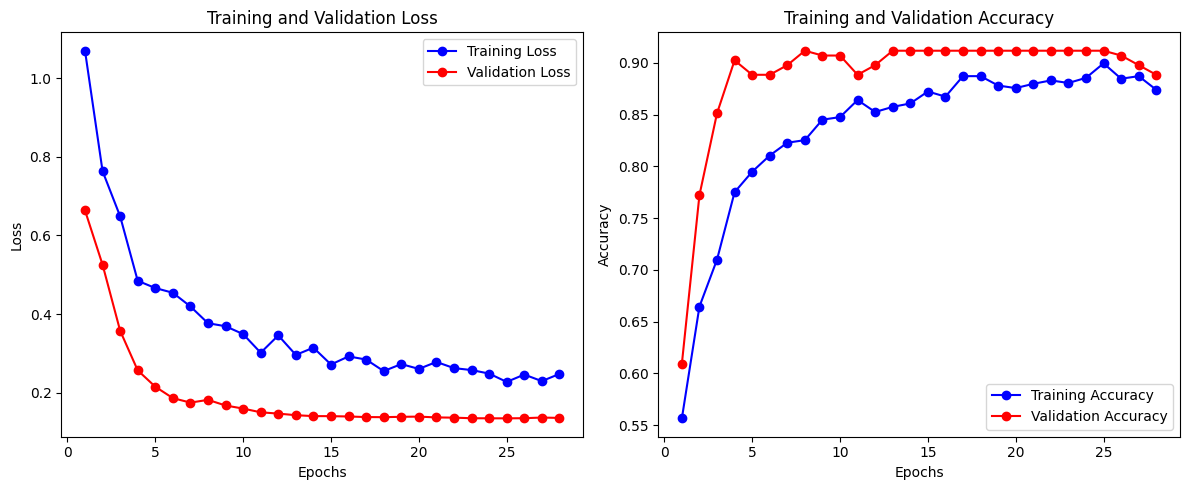

In [ ]:
# Re-run the function definition cell, if needed:
def plot_training_history(history):
    import matplotlib.pyplot as plt
    # Extracting loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    # Plotting Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Now, call the function with your model's history
plot_training_history(history)


8/8 [==============================] - 1s 25ms/step


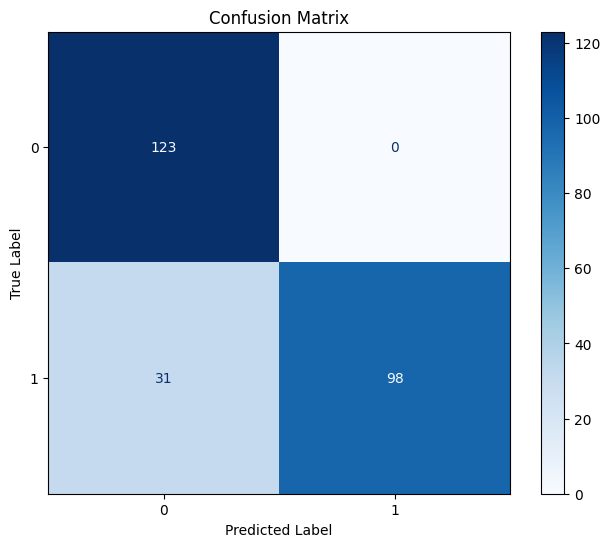

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming `model` is your trained model, and `x_test` and `y_test` are your test dataset
# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
